In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
dataset=pd.read_excel("a_Dataset_CreditScoring.xlsx")

# **Data preparation**

In [33]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [34]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [35]:
# explore missing values
dataset.isna().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [36]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [37]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [38]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [39]:
dataset.columns

Index(['TARGET', 'ID', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [40]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [41]:
# Separate features and target
# X = dataset.drop('TARGET', axis=1)
# y = dataset['TARGET']
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ... (Your previous code for loading and preprocessing the dataset)

# Separate features and target BEFORE scaling
X = dataset.drop('TARGET', axis=1)
y = dataset['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Imputation (e.g., using mean imputation)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'most_frequent' if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
# Train the classification model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}\n")

Logistic Regression:
[[465  17]
 [ 97  21]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       482
           1       0.55      0.18      0.27       118

    accuracy                           0.81       600
   macro avg       0.69      0.57      0.58       600
weighted avg       0.77      0.81      0.77       600

Accuracy: 0.81



In [48]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}\n")

Decision Tree Classifier:
[[422  60]
 [ 75  43]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       482
           1       0.42      0.36      0.39       118

    accuracy                           0.78       600
   macro avg       0.63      0.62      0.63       600
weighted avg       0.76      0.78      0.77       600

Accuracy: 0.775



In [49]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")


Random Forest Classifier:
[[473   9]
 [104  14]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       482
           1       0.61      0.12      0.20       118

    accuracy                           0.81       600
   macro avg       0.71      0.55      0.55       600
weighted avg       0.78      0.81      0.76       600

Accuracy: 0.8116666666666666



# **Visualizations**

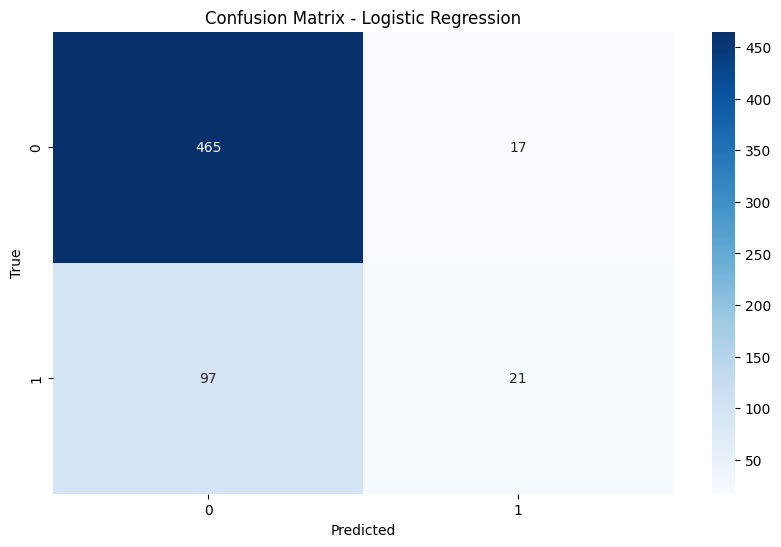

In [50]:
# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


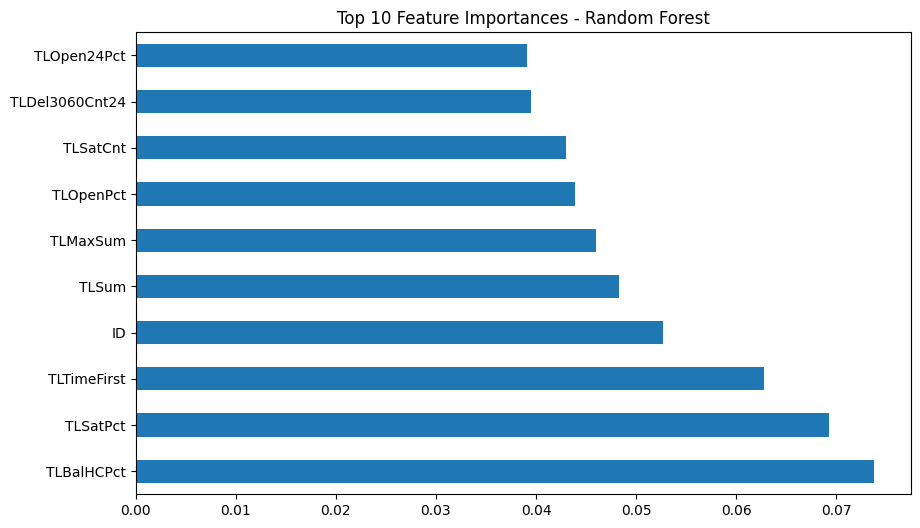

In [51]:
# Feature Importance - Random Forest
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

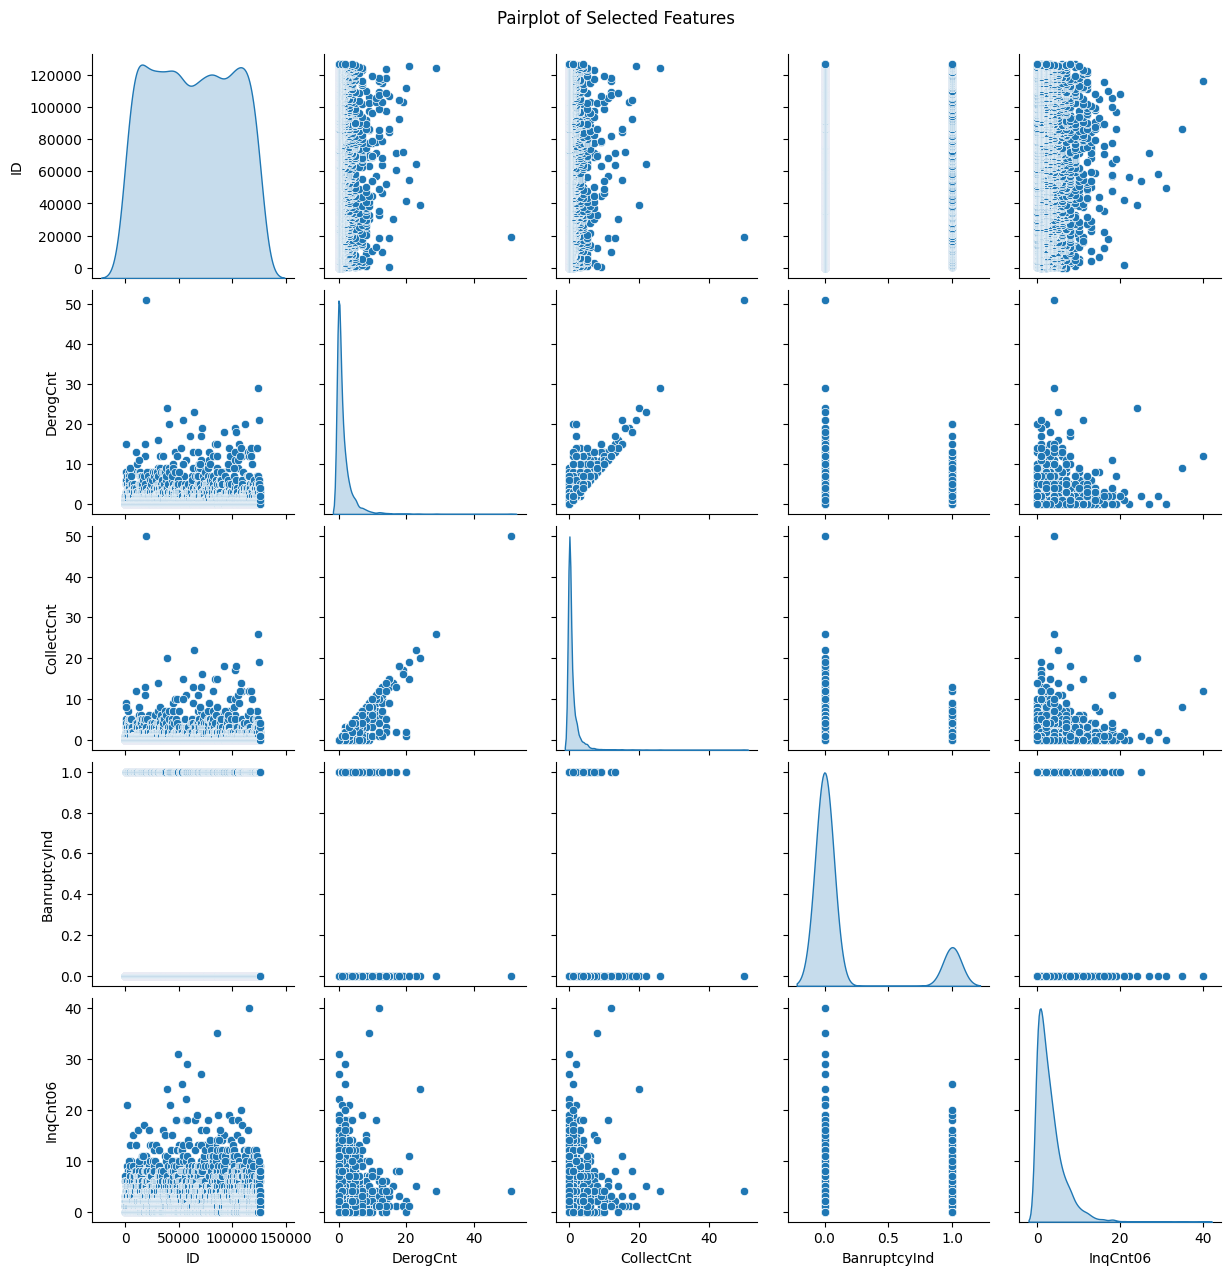

In [52]:
# Pairplot of selected features
selected_features = X.columns[:5]  # Select first 5 features for visualization
sns.pairplot(dataset[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


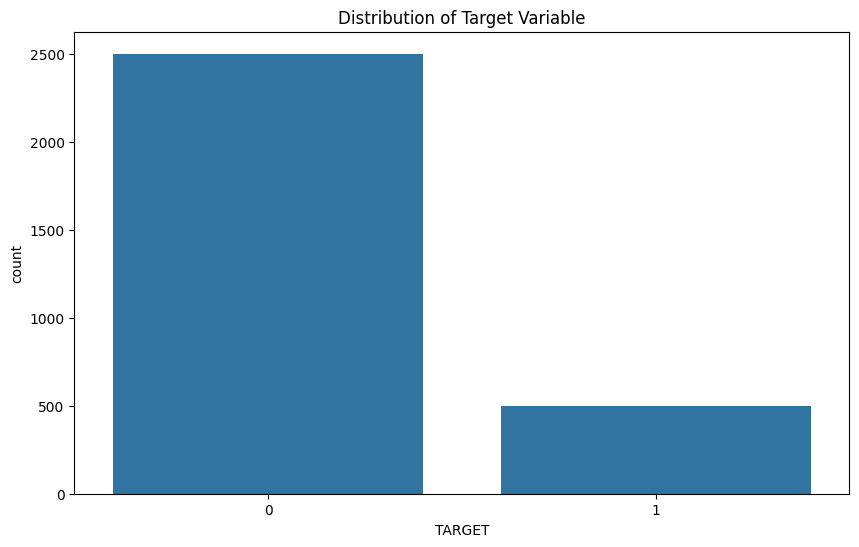

In [53]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.show()

In [54]:
 #Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[474   8]
 [105  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       482
           1       0.62      0.11      0.19       118

    accuracy                           0.81       600
   macro avg       0.72      0.55      0.54       600
weighted avg       0.78      0.81      0.75       600


Accuracy Score:
0.8116666666666666


In [55]:
# Save the trained model for future use
import joblib
joblib.dump(rf_clf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved as 'random_forest_model.pkl' and 'scaler.pkl'")

Model and scaler saved as 'random_forest_model.pkl' and 'scaler.pkl'
